In [1]:
#本次实验 目的是为了了解不同隐含层数以及激活函数等参数对预测结果的影响
#代码框架非本人编写 使用教授给的代码
from keras.datasets import reuters 
 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

Using TensorFlow backend.


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [4]:
x_val = x_train[:100]
partial_x_train = x_train[100:]
y_val = one_hot_train_labels[:100]
partial_y_train = one_hot_train_labels[100:]

In [5]:
from keras import models
from keras import layers



In [6]:
model_rmsprop = models.Sequential()
#model_rmsprop.add(layers.Embedding(20, 128, input_length=20))
#model_rmsprop.add(layers.MaxPooling1D(5))
#model_rmsprop.add(layers.Conv1D(64, 5, activation='relu'))
model_rmsprop.add(layers.Dense(128, activation='relu'))
model_rmsprop.add(layers.Dense(46, activation='relu'))
model_rmsprop.add(layers.Dense(46, activation='softmax'))


In [7]:
model_rmsprop.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
import keras
#keras.optimizers.rmsprop(lr=0.0001)
history_2=model_rmsprop.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=16,
validation_data=(x_val, y_val))
results = model_rmsprop.evaluate(x_test, one_hot_test_labels)


Train on 8882 samples, validate on 100 samples
Epoch 1/30
8882/8882 [==============================] - 20s 2ms/step - loss: 1.2985 - accuracy: 0.7177 - val_loss: 0.7314 - val_accuracy: 0.8500
Epoch 2/30
8882/8882 [==============================] - 21s 2ms/step - loss: 0.6953 - accuracy: 0.8528 - val_loss: 0.7155 - val_accuracy: 0.8800
Epoch 3/30
8882/8882 [==============================] - 19s 2ms/step - loss: 0.4452 - accuracy: 0.9032 - val_loss: 0.7342 - val_accuracy: 0.8800
Epoch 4/30
8882/8882 [==============================] - 18s 2ms/step - loss: 0.3263 - accuracy: 0.9310 - val_loss: 0.8338 - val_accuracy: 0.8700
Epoch 5/30
8882/8882 [==============================] - 19s 2ms/step - loss: 0.2722 - accuracy: 0.9420 - val_loss: 0.8824 - val_accuracy: 0.8600
Epoch 6/30
8882/8882 [==============================] - 18s 2ms/step - loss: 0.2342 - accuracy: 0.9484 - val_loss: 1.0187 - val_accuracy: 0.8700
Epoch 7/30
8882/8882 [==============================] - 18s 2ms/step - loss: 0.221

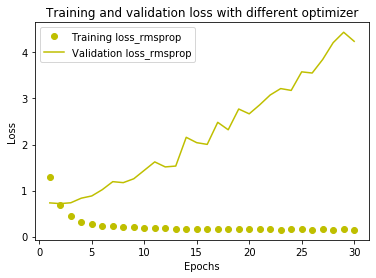

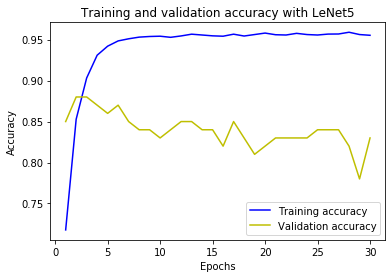

In [10]:
import matplotlib.pyplot as plt

#loss_rmsprop = history_1.history['loss']
loss_rmsprop = history_2.history['loss']

loss= loss_rmsprop

#val_loss_rmsprop = history_1.history['val_loss']
val_loss_rmsprop = history_2.history['val_loss']

epochs = range(1, len(loss_rmsprop) + 1)

#plt.plot(epochs, loss_rmsprop, 'bo', label='Training loss_rmsprop')
plt.plot(epochs, loss_rmsprop, 'yo', label='Training loss_rmsprop')

#plt.plot(epochs, val_loss_rmsprop, 'b', label='Validation loss_rmsprop')
plt.plot(epochs, val_loss_rmsprop, 'y', label='Validation loss_rmsprop')

plt.title('Training and validation loss with different optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

#acc_rmsprop = history_1.history['accuracy']
#val_acc_rmsprop = history_1.history['val_accuracy']

#plt.plot(epochs, acc_rmsprop, 'bo', label='Training accuracy_rmsprop')
#plt.plot(epochs, val_acc_rmsprop, 'b', label='Validation accuracy_rmsprop')

acc_rmsprop = history_2.history['accuracy']
val_acc_rmsprop = history_2.history['val_accuracy']
plt.plot(epochs, acc_rmsprop, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_rmsprop, 'y', label='Validation accuracy')

plt.title('Training and validation accuracy with LeNet5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()